In [5]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from data_clean import clean_data, get_features, createDataframe

In [49]:
group_size = 100

In [50]:
dataFrames = []

In [51]:
dataFrames.append(createDataframe('raw data/2020-12-10tony650steps.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10mary1.csv', group_size, 150))
dataFrames.append(createDataframe('raw data/161cm walk1.csv', group_size, 161))
dataFrames.append(createDataframe('raw data/173cm walk1.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-10peter166.csv', group_size, 166))
dataFrames.append(createDataframe('raw data/176cm walk.csv', group_size, 176))
dataFrames.append(createDataframe('raw data/173cm walk2.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/173cm walk3.csv', group_size, 173))
dataFrames.append(createDataframe('raw data/2020-12-06walka.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-06walkb.csv', group_size, 178))
dataFrames.append(createDataframe('raw data/2020-12-10judy153.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy2.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10judy3.csv', group_size, 153))
dataFrames.append(createDataframe('raw data/2020-12-10andrew169.csv', group_size, 169))
dataFrames.append(createDataframe('raw data/180cm walk.csv', group_size, 180))

In [52]:
merged_df = pd.concat(dataFrames)
sampled_df = merged_df

In [ ]:
merged_df.count()

In [53]:
merged_df.groupby(['height']).count()

,speed,distance,steps,time,v3
height,,,,,
150,2167,2167,2167,2167,2167
153,14945,14945,14945,14945,14945
161,3305,3305,3305,3305,3305
166,22677,22677,22677,22677,22677
169,4014,4014,4014,4014,4014
173,9798,9798,9798,9798,9798
176,6426,6426,6426,6426,6426
178,14605,14605,14605,14605,14605
180,47,47,47,47,47


In [54]:
sampled_df = merged_df.groupby(['height']).sample(15000, replace=True)

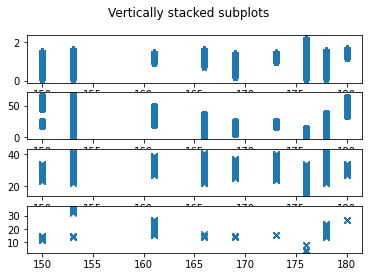

In [37]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(sampled_df['height'], sampled_df['speed'], "*")
axs[1].plot(sampled_df['height'], sampled_df['distance'], "o")
axs[2].plot(sampled_df['height'], sampled_df['steps'], "x")
axs[3].plot(sampled_df['height'], sampled_df['time'], "x")

In [68]:
sampled_df

,speed,distance,steps,time,height
984,1.436597,7.519350,8.0,3.428,150
435,1.508785,5.457189,8.0,3.443,150
1845,1.434062,5.404745,7.0,3.458,150
1311,1.534236,6.251893,7.0,3.455,150
2328,1.440000,4.307568,8.0,3.477,150
...,...,...,...,...,...
1490,1.491424,5.288752,6.0,3.497,178
1052,1.434549,5.945543,7.0,4.505,178
1465,1.406667,6.985454,6.0,3.440,178
3876,1.306528,6.997781,6.0,3.459,178


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre

X = sampled_df[['speed','distance','steps', 'time', 'v3']].to_numpy()
y = sampled_df['height'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)

scaler = pre.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline( PolynomialFeatures(8), LinearRegression())
result_poly = poly_model.fit(X_train, y_train)
result_poly.score(X_test, y_test)

0.9206537436054953

In [27]:
mpl_model = make_pipeline( MLPRegressor(hidden_layer_sizes=(800,800,800,800,800)))
result_mpl = mpl_model.fit(X_train_scaled, y_train)
result_mpl.score(X_test_scaled, y_test)

0.20553501945731323

In [42]:
mpl_model = make_pipeline( MLPRegressor(hidden_layer_sizes=(40,40,40,40,40,40,40,40,40,40,40)))
result_mpl = mpl_model.fit(X_train_scaled, y_train)
result_mpl.score(X_test_scaled, y_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3578101043989602

In [58]:
mpl_model3 = make_pipeline( MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=2000, tol=0.01))
result_mpl3 = mpl_model3.fit(X_train_scaled, y_train)
result_mpl3.score(X_test_scaled, y_test)

0.9278375876804172

In [59]:
y_predict = result_mpl3.predict(X_test_scaled)

(array([3.000e+00, 0.000e+00, 6.000e+00, 7.000e+00, 7.000e+00, 1.200e+01,
        1.300e+01, 2.600e+01, 4.500e+01, 3.700e+01, 5.600e+01, 6.000e+01,
        1.570e+02, 2.300e+02, 3.410e+02, 8.380e+02, 1.299e+03, 1.611e+03,
        8.810e+02, 4.930e+02, 2.510e+02, 1.140e+02, 7.600e+01, 3.800e+01,
        1.900e+01, 2.200e+01, 1.800e+01, 1.900e+01, 2.000e+01, 7.000e+00,
        1.900e+01, 1.400e+01, 5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([-13.78844148, -12.93888039, -12.08931929, -11.23975819,
        -10.3901971 ,  -9.540636  ,  -8.6910749 ,  -7.84151381,
         -6.99195271,  -6.14239161,  -5.29283052,  -4.44326942,
         -3.59370832,  -2.74414723,  -1.89458613,  -1.04502503,
         -0.19546393,   0.65409716,   1.50365826,   2.35321936,
          3.20278045,   4.05234155,   4.90190265,   5.75146374,
          6.60102484,   7.45058594,   8.30014703,   9.14970813,
          9.99926923,  10.84883032,  11.69839142,  12.

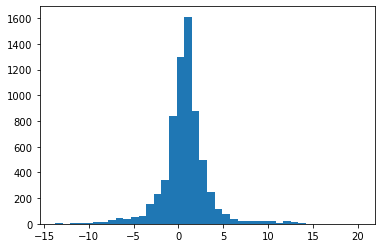

In [60]:
y_diff = y_predict - y_test
plt.hist(y_diff, bins = 40)

In [35]:
len(y_predict)

2444

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_class = make_pipeline( 
        RandomForestClassifier(n_estimators=400,
        max_depth=15, min_samples_leaf=15)
    )

In [57]:
model_class.fit(X_train_scaled, y_train)
model_class.score(X_test_scaled, y_test)

0.9496296296296296